In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
import numpy as np

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 
  
# metadata 
print(polish_companies_bankruptcy.metadata) 
  
# variable information 
print(polish_companies_bankruptcy.variables) 

{'uci_id': 365, 'name': 'Polish Companies Bankruptcy', 'repository_url': 'https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data', 'data_url': 'https://archive.ics.uci.edu/static/public/365/data.csv', 'abstract': 'The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10503, 'num_features': 65, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5F600', 'creators': ['Sebastian Tomczak'], 'intro_paper': {'ID': 417, 'type': 'NATIVE', 'title': 'Ensemble boosted trees with synthetic features generation in application to bankruptcy predictio

In [3]:
print(polish_companies_bankruptcy.metadata['additional_info'])

{'summary': 'The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.\r\nBasing on the collected data five classification cases were distinguished, that depends on the forecasting period:\r\n- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.\r\n- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. 

In [4]:
print(polish_companies_bankruptcy.metadata['additional_info']['summary'])

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 1017

In [5]:
print(polish_companies_bankruptcy.metadata['additional_info']['variable_info'])

X1	net profit / total assets
X2	total liabilities / total assets
X3	working capital / total assets
X4	current assets / short-term liabilities
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
X6	retained earnings / total assets
X7	EBIT / total assets
X8	book value of equity / total liabilities
X9	sales / total assets
X10	equity / total assets
X11	(gross profit + extraordinary items + financial expenses) / total assets
X12	gross profit / short-term liabilities
X13	(gross profit + depreciation) / sales
X14	(gross profit + interest) / total assets
X15	(total liabilities * 365) / (gross profit + depreciation)
X16	(gross profit + depreciation) / total liabilities
X17	total assets / total liabilities
X18	gross profit / total assets
X19	gross profit / sales
X20	(inventory * 365) / sales
X21	sales (n) / sales (n-1)
X22	profit on operating activities / total assets
X23	net profit / sales
X24	gross profit (in 3 years) / total a

### EDA

In [6]:
X.shape

(43405, 65)

In [7]:
X.columns

Index(['year', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40',
       'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50',
       'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60',
       'A61', 'A62', 'A63', 'A64'],
      dtype='object')

Mocno niezbalansowane

In [8]:
y.value_counts()

class
0        41314
1         2091
Name: count, dtype: int64

In [9]:
df = pd.DataFrame(X) 
target = pd.DataFrame(y) 
df['label'] = target
df['label_name'] = target.apply(lambda x: 'bankrupt' if x['class'] == 1.0 else 'non-baknrupt', axis=1)

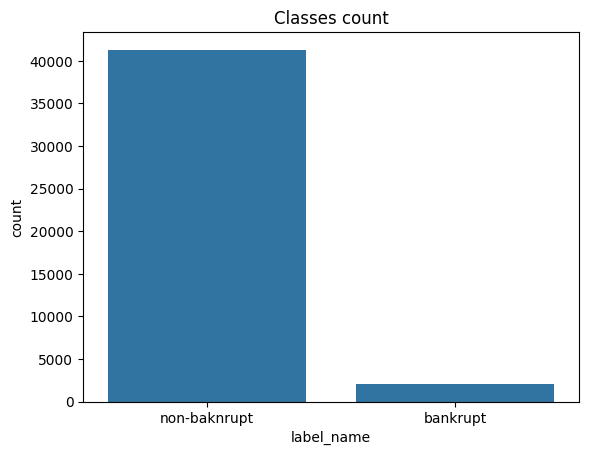

In [10]:
sns.countplot(df, x='label_name')
_ = plt.title('Classes count')

In [11]:
attrs = X.columns[1:].values.tolist()

In [12]:
df_desc = df.describe()[attrs]
df_desc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853480e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672346e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.481067e+02,17.033202,1.502521e+03,9.343074,72.796105
std,2.994109,5.842748,5.439429,295.434425,6.122797e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005349e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234518e+04,553.049406,1.393023e+05,124.177354,2369.744596
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190000e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.810000e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.340000e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.120000e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


Text(0.5, 1.0, 'Distribution by year')

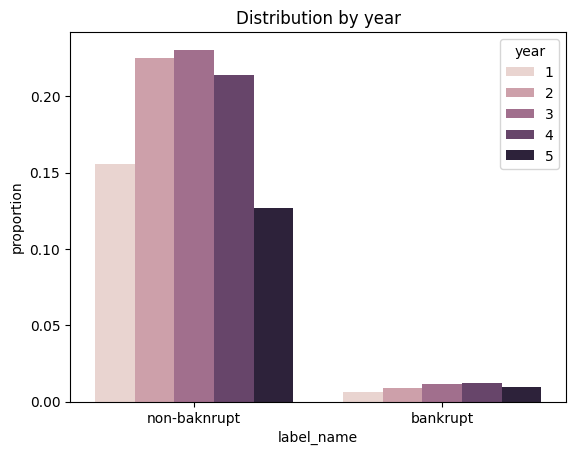

In [13]:
sns.countplot(
    df, x='label_name', hue='year', stat='proportion'
)
plt.title('Distribution by year')

Warto zauważyć bardzo duży zakres w danych, trzeba było użyć skalę logarytmiczną, żeby wykres miał sens

c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


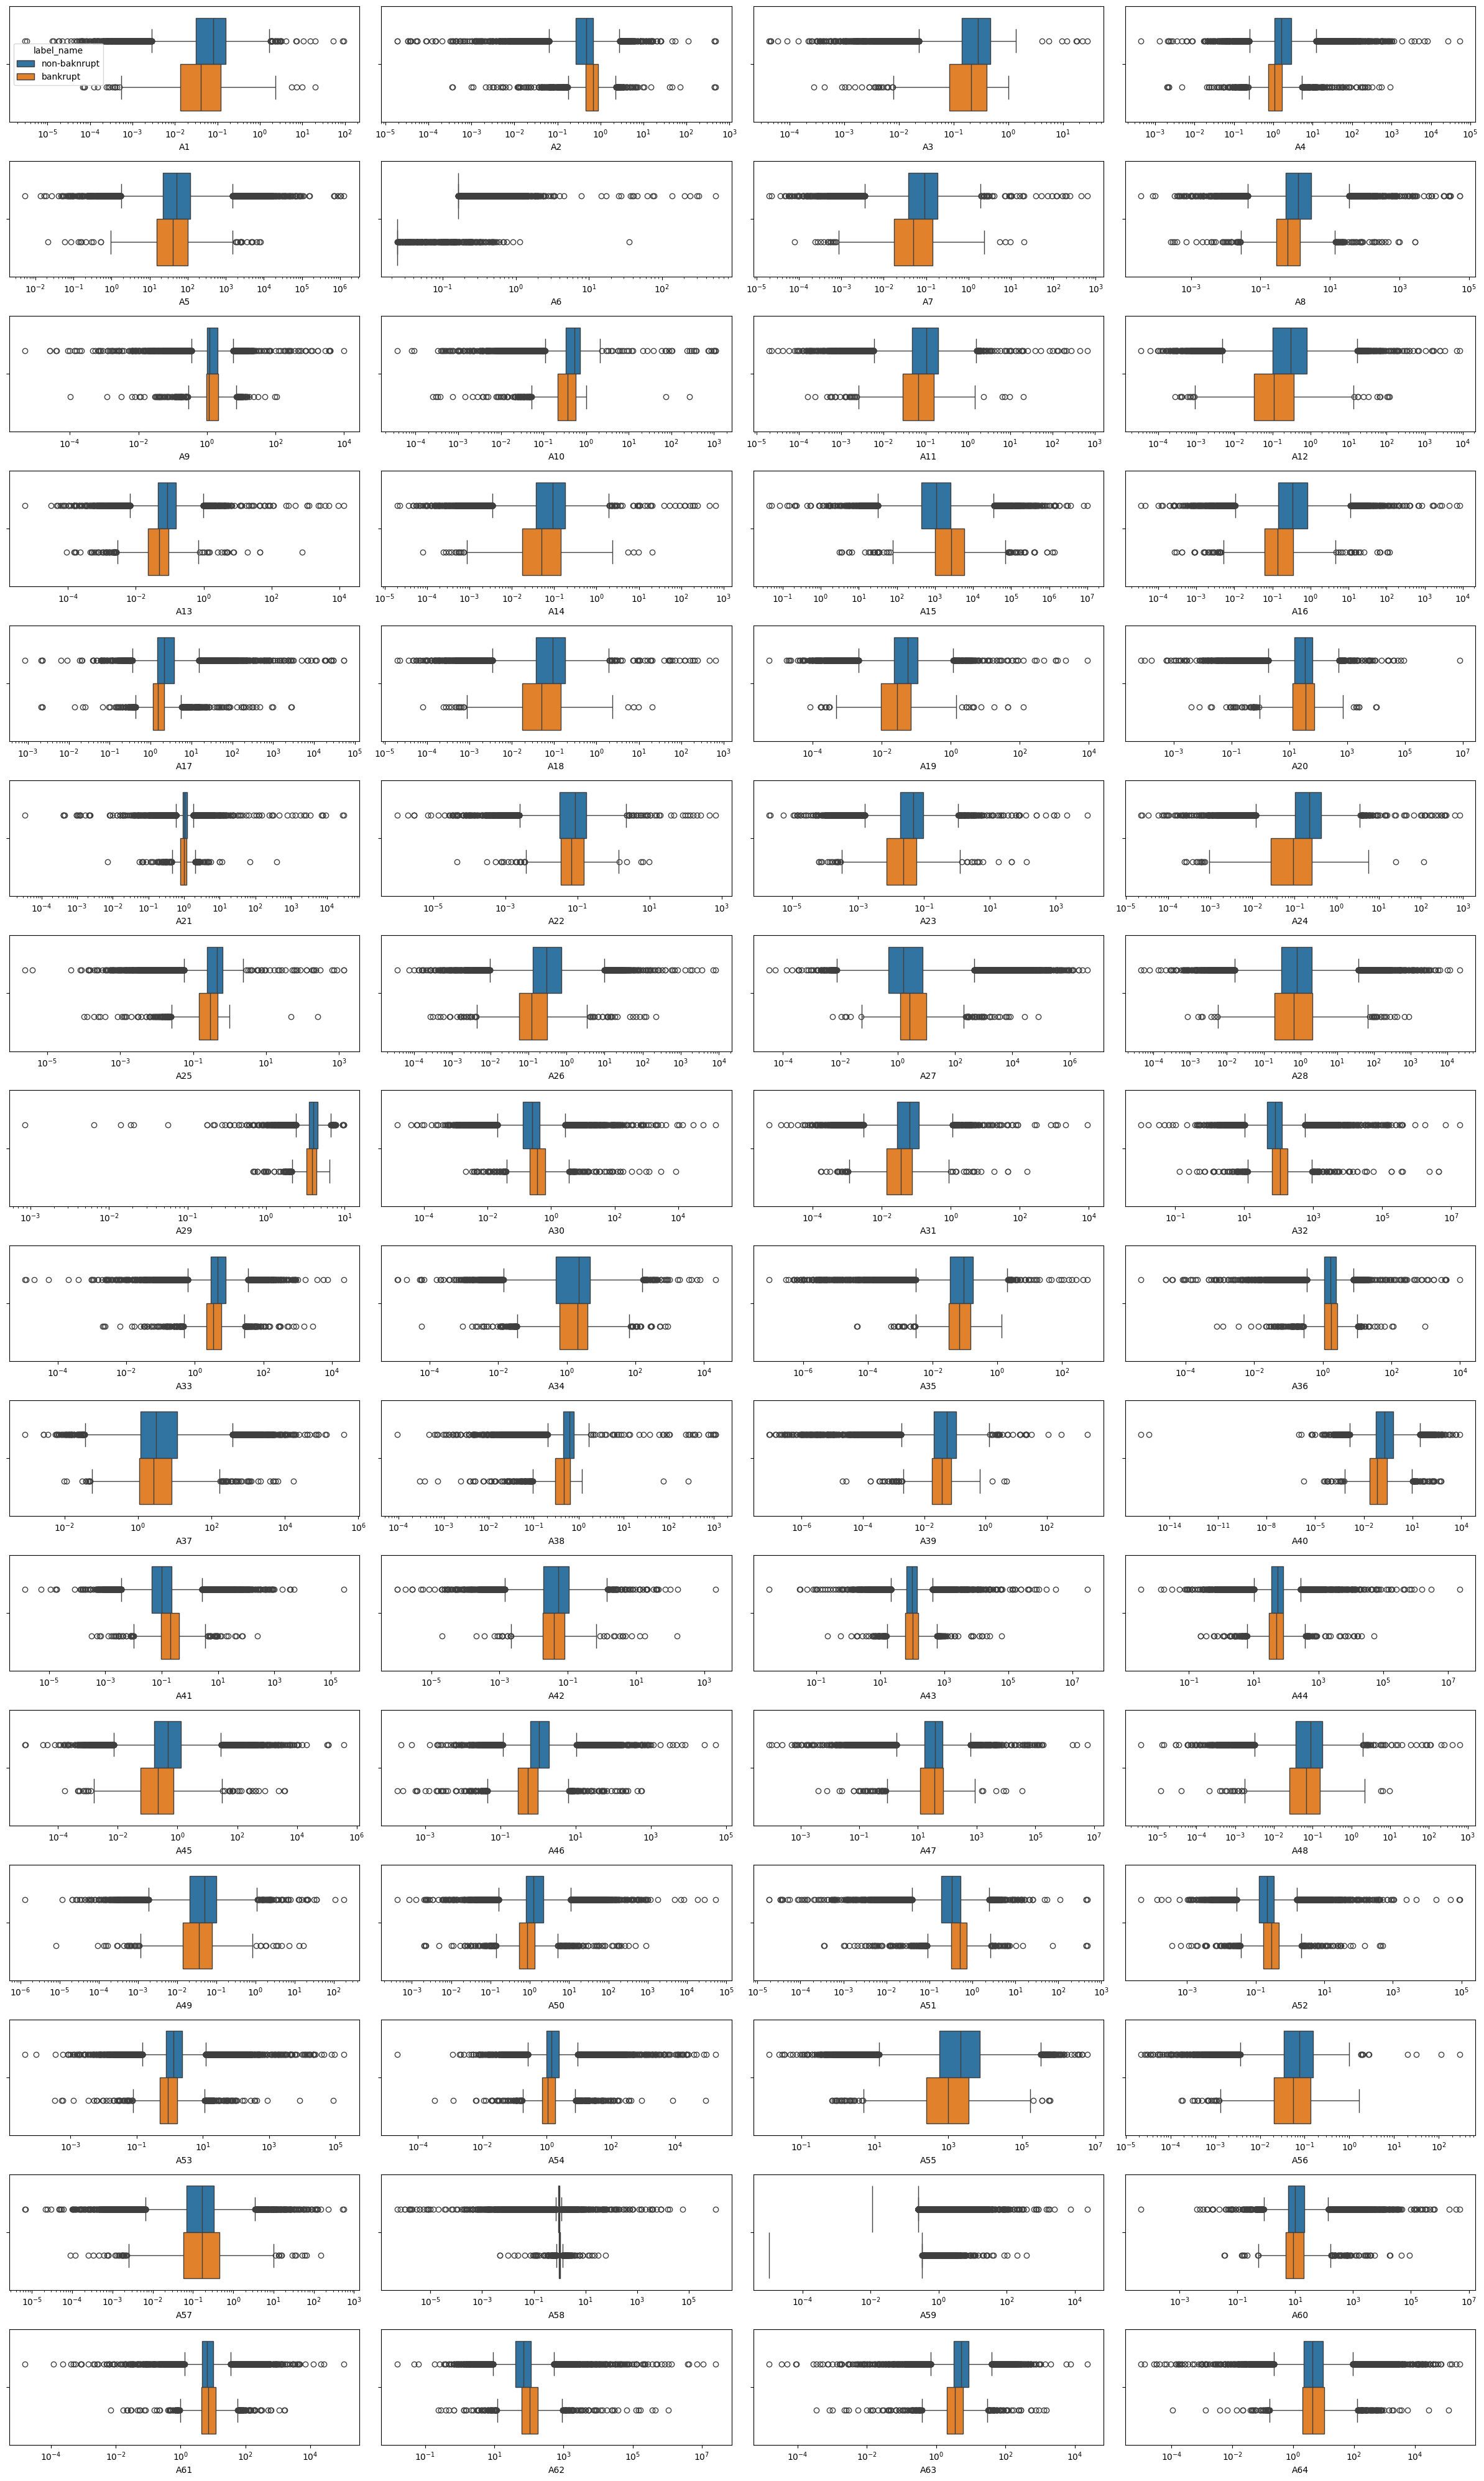

In [15]:
fig, axes = plt.subplots(16, 4, figsize=(24, 40))

axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(df, x=attrs[i], ax=ax, hue='label_name', log_scale=True, legend='auto' if i == 0 else False)
fig.tight_layout()

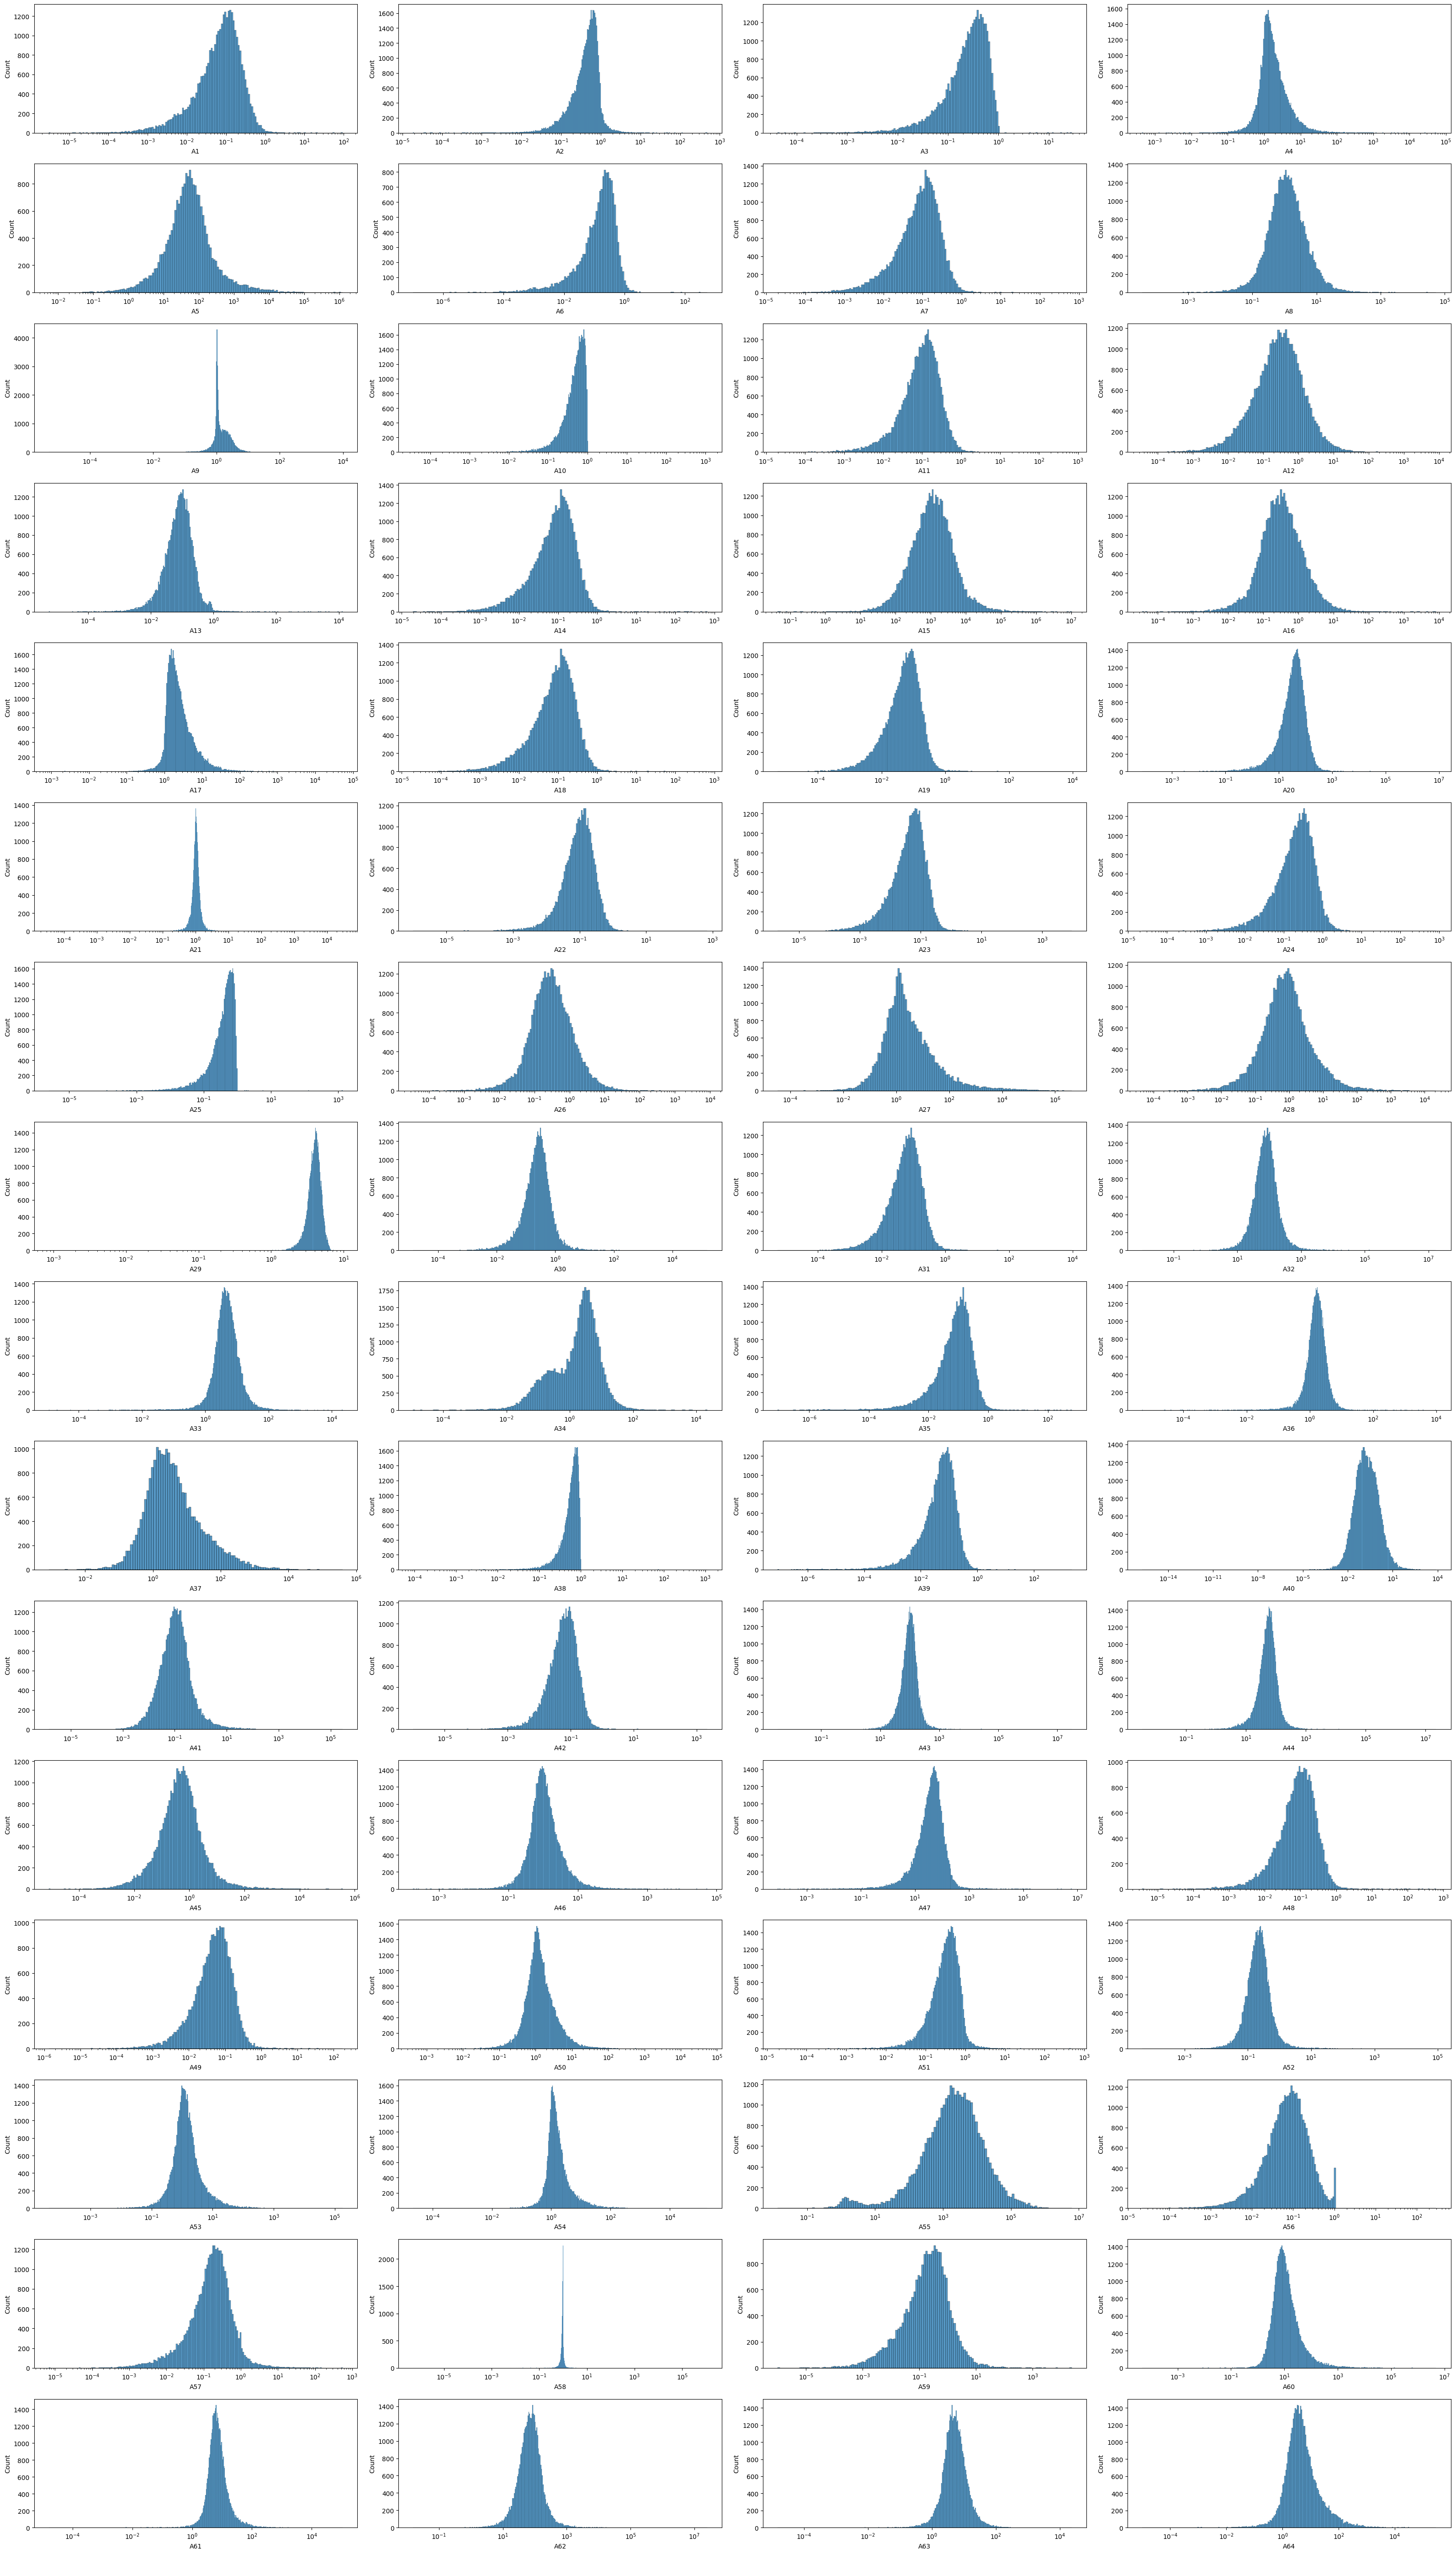

In [14]:
fig, axes = plt.subplots(16, 4, figsize=(32, 56))

axes = axes.flatten()

for i, ax in enumerate(axes):
    axp = sns.histplot(df, x=attrs[i], ax=ax, log_scale=True)

fig.tight_layout()

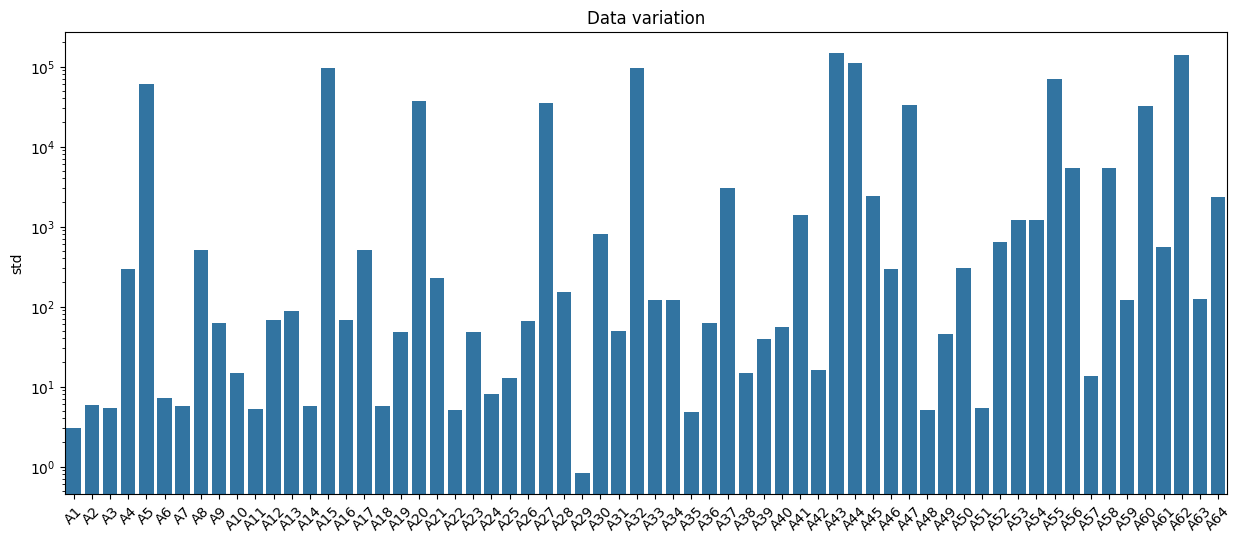

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(df_desc.loc['std'])
plt.title('Data variation')
plt.yscale('log')
_ = plt.xticks(rotation=45)

In [19]:
null_cols_percent = df[attrs].isnull().sum(axis=0) / df.shape[0]

In [20]:
null_cols_percent_labeled = df.groupby('label_name').agg(lambda x: (x.isnull().sum() / x.shape[0]))
null_cols_percent_labeled_long = null_cols_percent_labeled.unstack().reset_index().rename({'level_0': 'attribute', 0: 'count'}, axis=1)

In [21]:
null_cols_percent_labeled['A37'], null_cols_percent['A37'] # check

(label_name
 bankrupt        0.467241
 non-baknrupt    0.435857
 Name: A37, dtype: float64,
 0.4373689667089045)

X21	sales (n) / sales (n-1)

X27	profit on operating activities / financial expenses

X28	working capital / fixed assets

X37	(current assets - inventories) / long-term liabilities

X41	total liabilities / ((profit on operating activities + depreciation) * (12/365))

X45	net profit / inventory

X53	equity / fixed assets

X54	constant capital / fixed assets

X60	sales / inventory

X64	sales / fixed assets

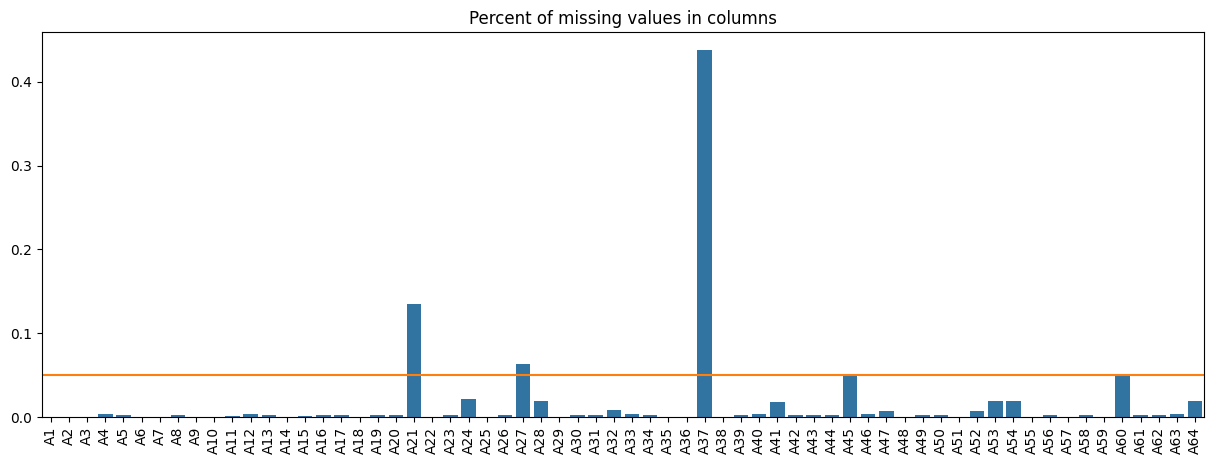

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(null_cols_percent)
plt.title('Percent of missing values in columns')
plt.axhline(y = 0.05, color='tab:orange')
_ = plt.xticks(rotation=90)

#### Rozkład brakujących wartości w klasach

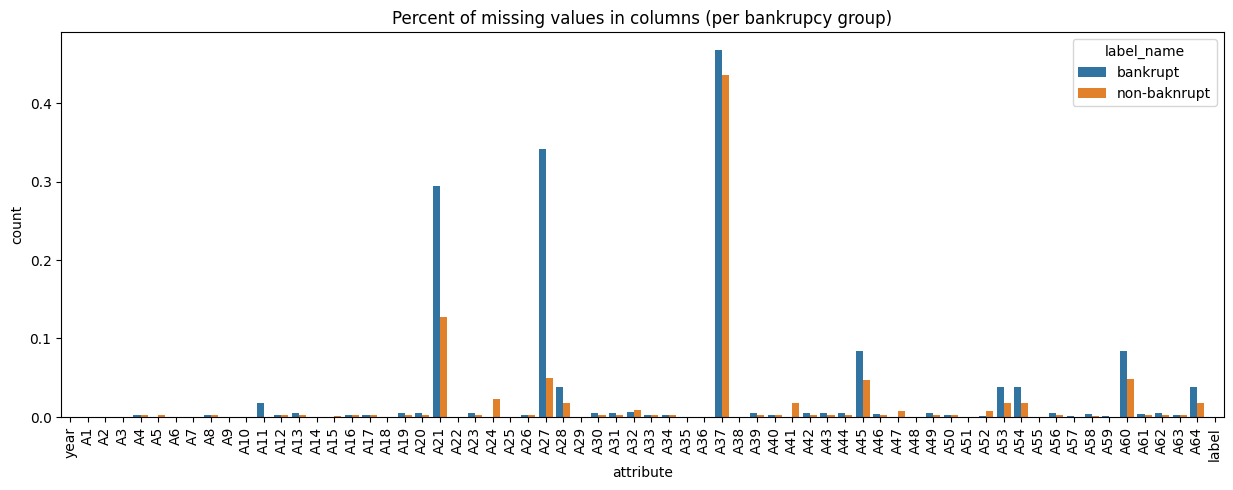

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(null_cols_percent_labeled_long, x='attribute', y='count', hue='label_name')
plt.title('Percent of missing values in columns (per bankrupcy group)')
_ = plt.xticks(rotation=90)

In [54]:
miss_cols = ['A21', 'A27', 'A37', 'A45', 'A60']

### Tylko absolutne wartości 

In [58]:
corr_matrix = df[attrs].corr()

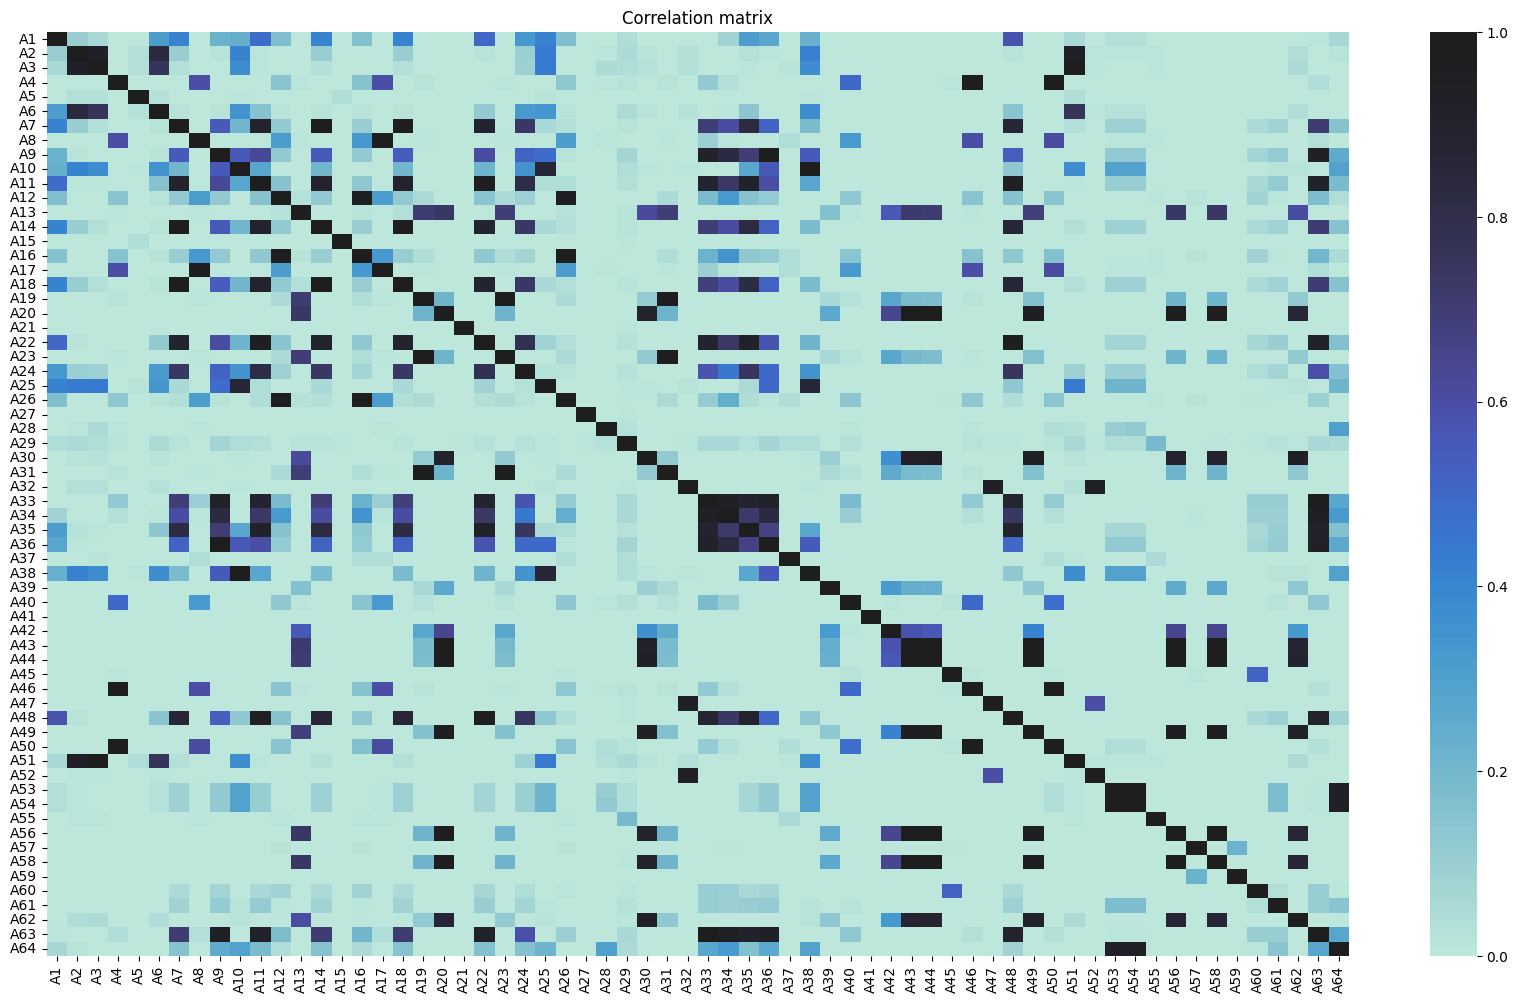

In [59]:
plt.figure(figsize=(21, 12))
sns.heatmap(
    abs(corr_matrix),
    vmin=0.0, vmax=1.0, center=True
)
_ = plt.title('Correlation matrix')

### Więc tak średnio da się zamodelować w zależności od innych kolumn

In [69]:
np.sum((abs(corr_matrix[miss_cols]) > 0.8))

c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


A21    1
A27    1
A37    1
A45    1
A60    1
dtype: int64

### Mean Imputer

In [55]:
df_desc[miss_cols]

,A21,A27,A37,A45,A60
count,37551.000000,4.064100e+04,24421.000000,41258.000000,4.125300e+04
mean,3.884997,1.107970e+03,105.075944,14.822592,4.481067e+02
std,228.668931,3.501480e+04,3058.035496,2428.124571,3.234518e+04
min,-1325.000000,-2.590000e+05,-525.520000,-256230.000000,-1.244000e+01
25%,0.908225,4.504800e-02,1.142300,0.019168,5.545500e+00
50%,1.045200,1.084100e+00,3.096300,0.282825,9.791700e+00
75%,1.203700,5.139300e+00,11.414000,0.955588,2.018100e+01
max,29907.000000,4.210000e+06,398920.000000,366030.000000,4.818700e+06


In [66]:
mean_imputation = pd.DataFrame(df[attrs]).fillna(df_desc.loc['mean'])
mean_imputation.describe()[miss_cols]

,A21,A27,A37,A45,A60
count,43405.000000,4.340500e+04,43405.000000,43405.000000,4.340500e+04
mean,3.884997,1.107970e+03,105.075944,14.822592,4.481067e+02
std,212.690090,3.388158e+04,2293.773202,2367.308780,3.153314e+04
min,-1325.000000,-2.590000e+05,-525.520000,-256230.000000,-1.244000e+01
25%,0.934070,1.062800e-01,2.485300,0.027707,5.729400e+00
50%,1.086800,1.278200e+00,47.120000,0.323390,1.040000e+01
75%,1.346100,8.273500e+00,105.075944,1.189800,2.389000e+01
max,29907.000000,4.210000e+06,398920.000000,366030.000000,4.818700e+06


#### Pojawiają się mod'y dla tych imputowanych wartości, nie do końca chyba warto tak robić 

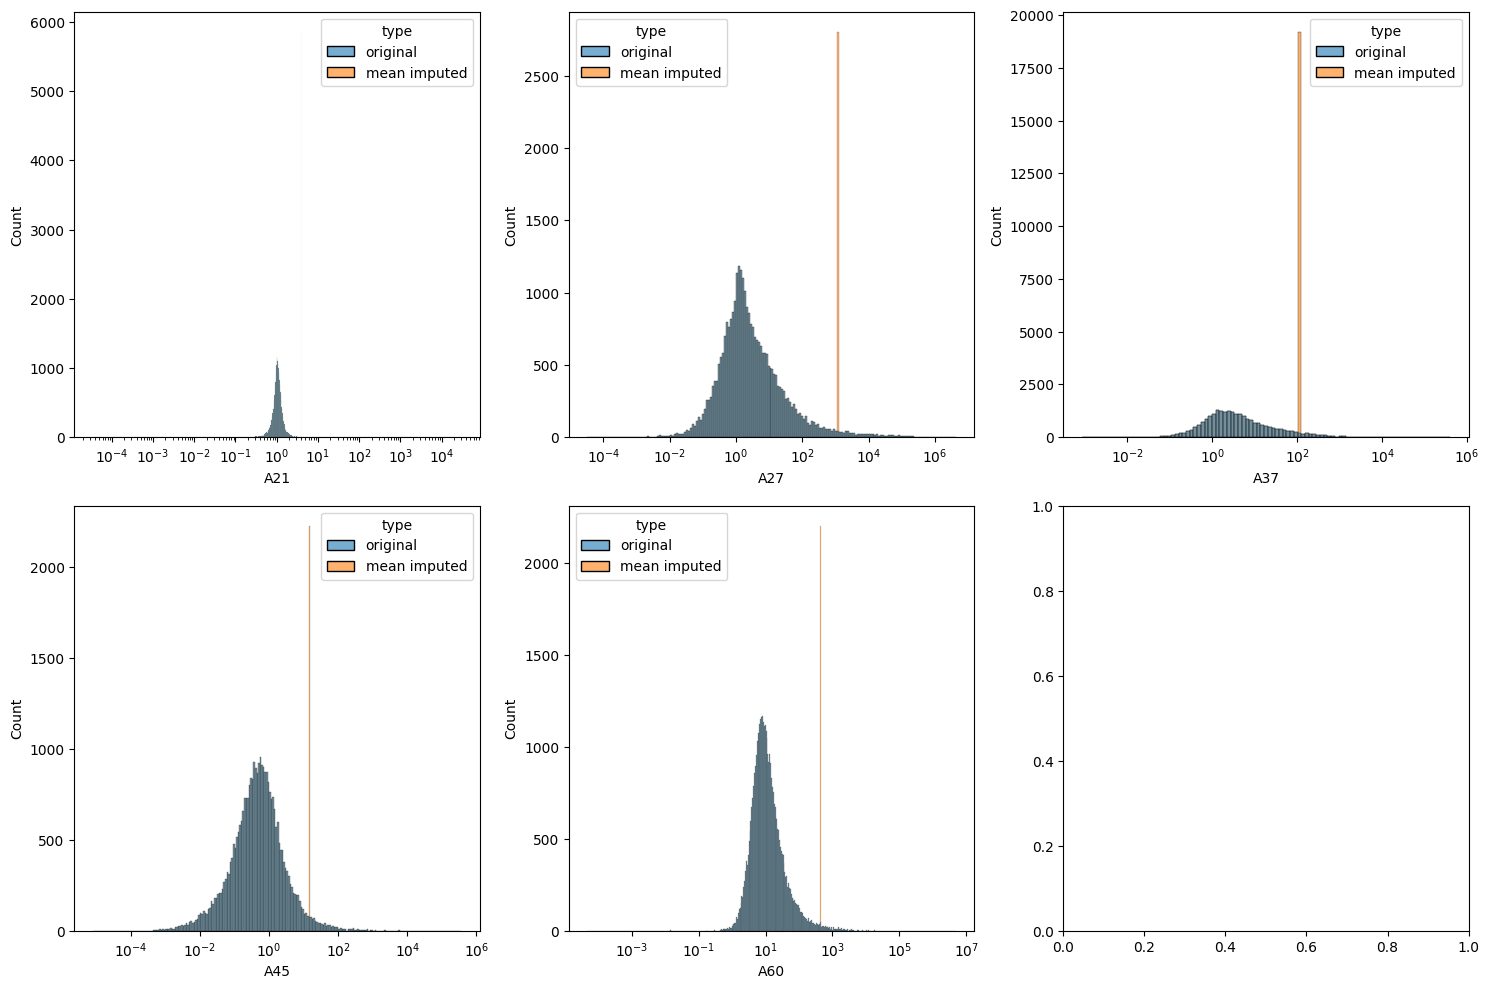

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

df['type'] = 'original'
mean_imputation['type'] = 'mean imputed'
data = pd.concat([df, mean_imputation], axis=0, ignore_index=True)

for i, ax in enumerate(axes[:-1]):
    sns.histplot(data, x=miss_cols[i], ax=ax, hue='type', log_scale=True, alpha=0.6, label='imputed')

fig.suptitle('Mean imputation distribution comparison')
fig.tight_layout()

### Przetestujmy KNNImputer

In [76]:
imputer = KNNImputer(n_neighbors=3)
X_knn = imputer.fit_transform(X.values, y)

In [80]:
df_knn = pd.DataFrame(X_knn, columns=X.columns)
df_knn[miss_cols].describe()

,A21,A27,A37,A45,A60
count,43405.000000,4.340500e+04,43405.000000,43405.000000,4.340500e+04
mean,3.508648,1.166271e+03,117.718132,14.940228,4.714863e+02
std,212.732271,3.425922e+04,2458.459270,2373.212464,3.211144e+04
min,-1325.000000,-2.590000e+05,-525.520000,-256230.000000,-1.244000e+01
25%,0.843280,2.256200e-02,1.742400,0.016166,5.607800e+00
50%,1.018200,1.099200e+00,5.283900,0.286300,1.002100e+01
75%,1.179800,5.493500e+00,21.255000,0.995140,2.112200e+01
max,29907.000000,4.210000e+06,398920.000000,366030.000000,4.818700e+06


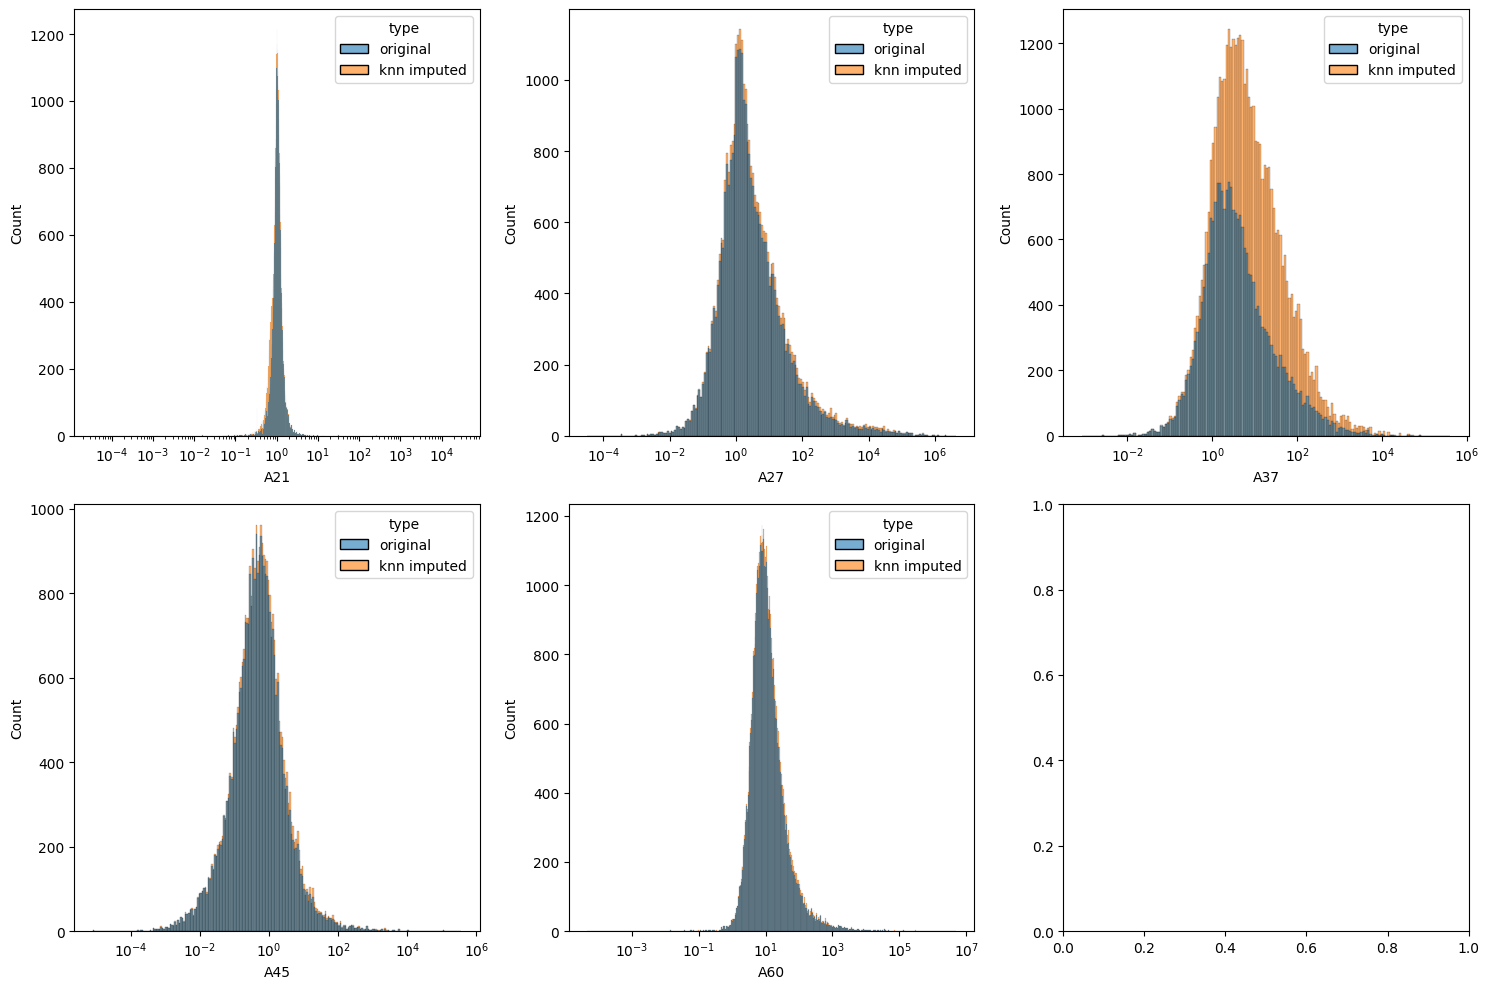

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

df['type'] = 'original'
df_knn['type'] = 'knn imputed'
data = pd.concat([df, df_knn], axis=0, ignore_index=True)

for i, ax in enumerate(axes[:-1]):
    sns.histplot(data, x=miss_cols[i], ax=ax, hue='type', log_scale=True, alpha=0.6, label='imputed')


fig.suptitle('KNN imputation distribution comparison')
fig.tight_layout()

### Wnioski

Mean Imputer - pojawia się nowa mod'a
 
KNN Imputer - trochę zmienia rozkład

## Preprocessing

Podejście: napisanie różnych pipelinów sklearnowych i próbowanie z różnymi skalerami itd 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X[['year', *attrs]], y, test_size=0.3, random_state=42, stratify=y)

In [22]:
df_desc['A58']

count    4.332100e+04
mean     3.002644e+01
std      5.334454e+03
min     -1.986900e+02
25%      8.753200e-01
50%      9.509600e-01
75%      9.926400e-01
max      1.108300e+06
Name: A58, dtype: float64

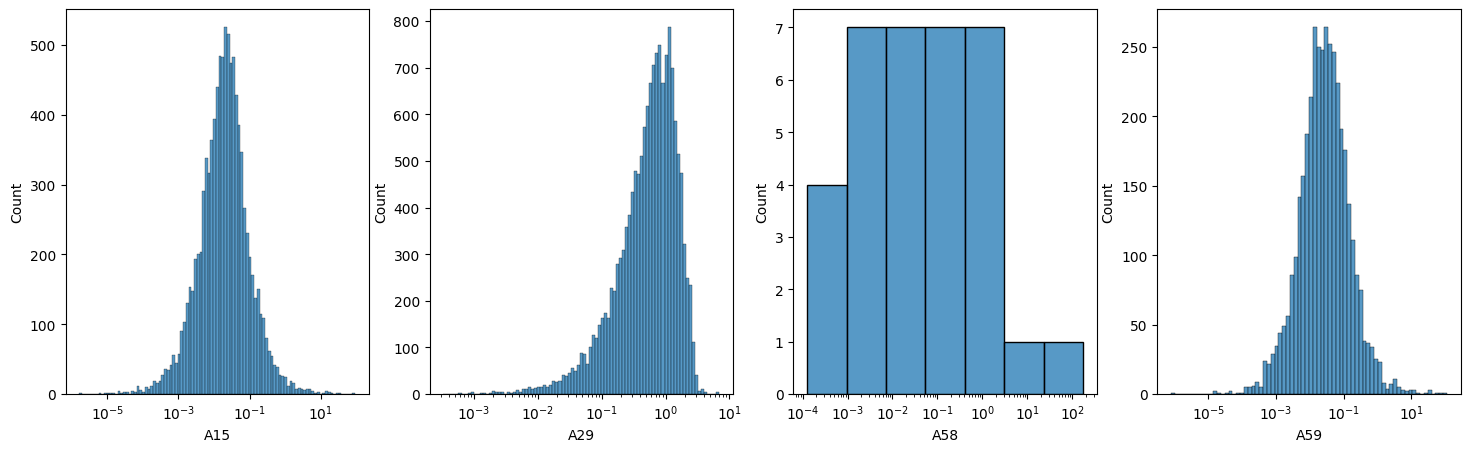

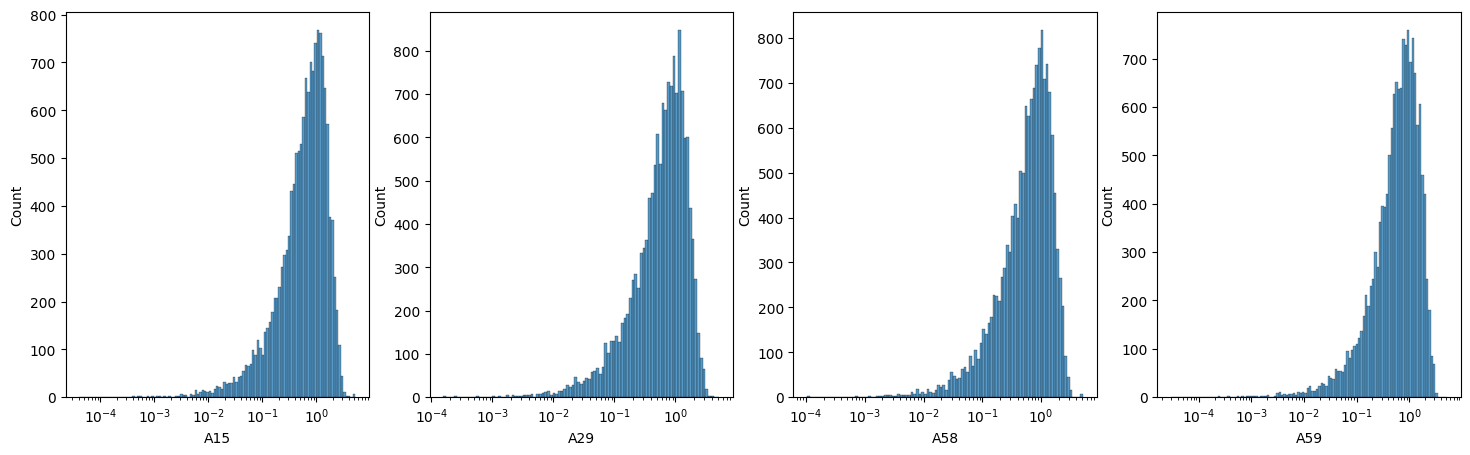

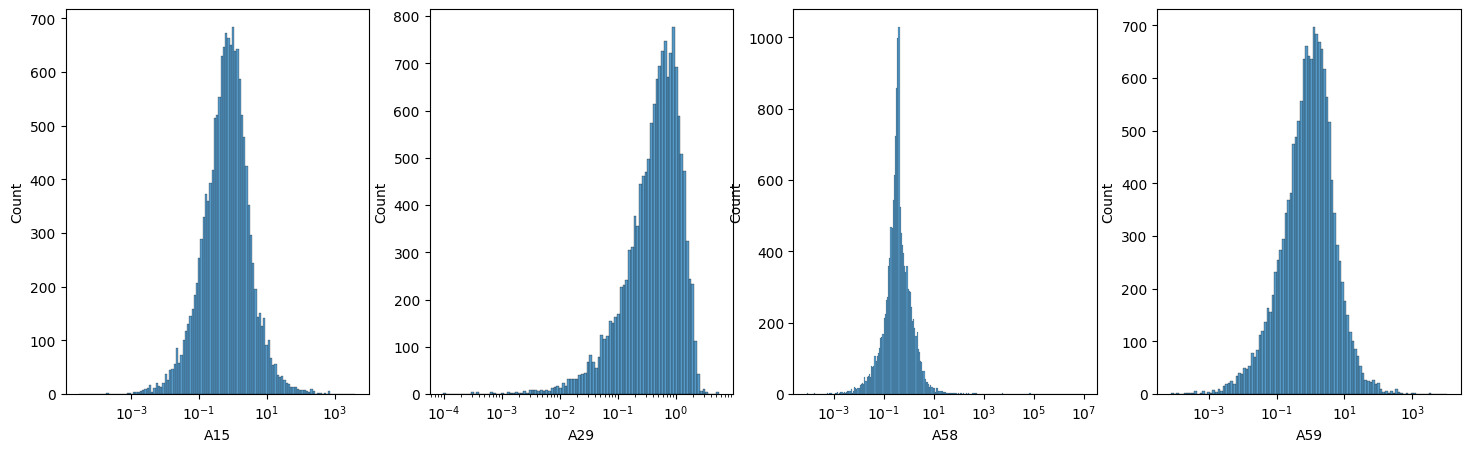

In [25]:
scalers = [
    ('standard', StandardScaler()), 
    ('quantile', QuantileTransformer(output_distribution='normal')),
    ('robust', RobustScaler())
]

scale = {
    'robust': 'log'
}

chosen_cols = ['A15', 'A29', 'A58', 'A59']

for name, scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:])
    df_scaled = pd.DataFrame(X_train_scaled, columns=attrs)

    plt.figure(figsize=(18, 5))
    for i, col in enumerate(chosen_cols, start=1):
        plt.subplot(1, 4, i)
        sns.histplot(df_scaled, x=col, log_scale=True)
    plt.show()

Do przemyślenia : wywalenie części wierszy, raczej tam, gdzie jest bankrupt, albo np. zastosować undersampling, albo klasteryzację https://scikit-learn.org/stable/modules/clustering.html

Explained variance ratio: [0.14058117 0.11450729 0.08504817 0.08211548], (0.4222521109861041)


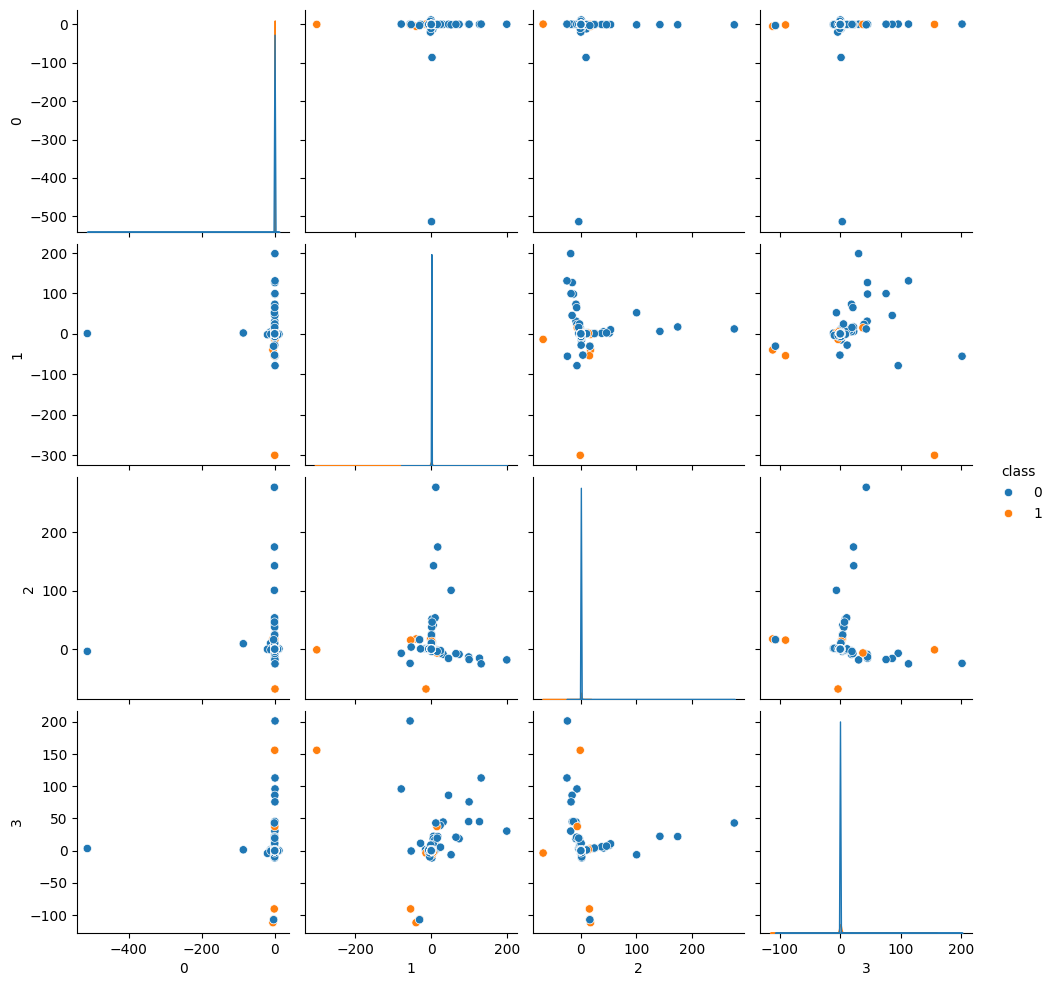

In [ ]:
# mozna z mean lub median
pipe_1 = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('standarization', StandardScaler()),
    ('pca', PCA(n_components=4))
])

X_train_1 = pipe_1.fit_transform(X_train)

print(f'Explained variance ratio: {pipe_1["pca"].explained_variance_ratio_}, ({sum(pipe_1["pca"].explained_variance_ratio_)})')

res_1_df = pd.concat([pd.DataFrame(X_train_1, index=X_train.index), pd.DataFrame(y_train)], axis=1)

sns.pairplot(res_1_df, hue='class')

Explained variance ratio: [0.99139824 0.00325731 0.00138707 0.00119855], (0.9972411712081134)


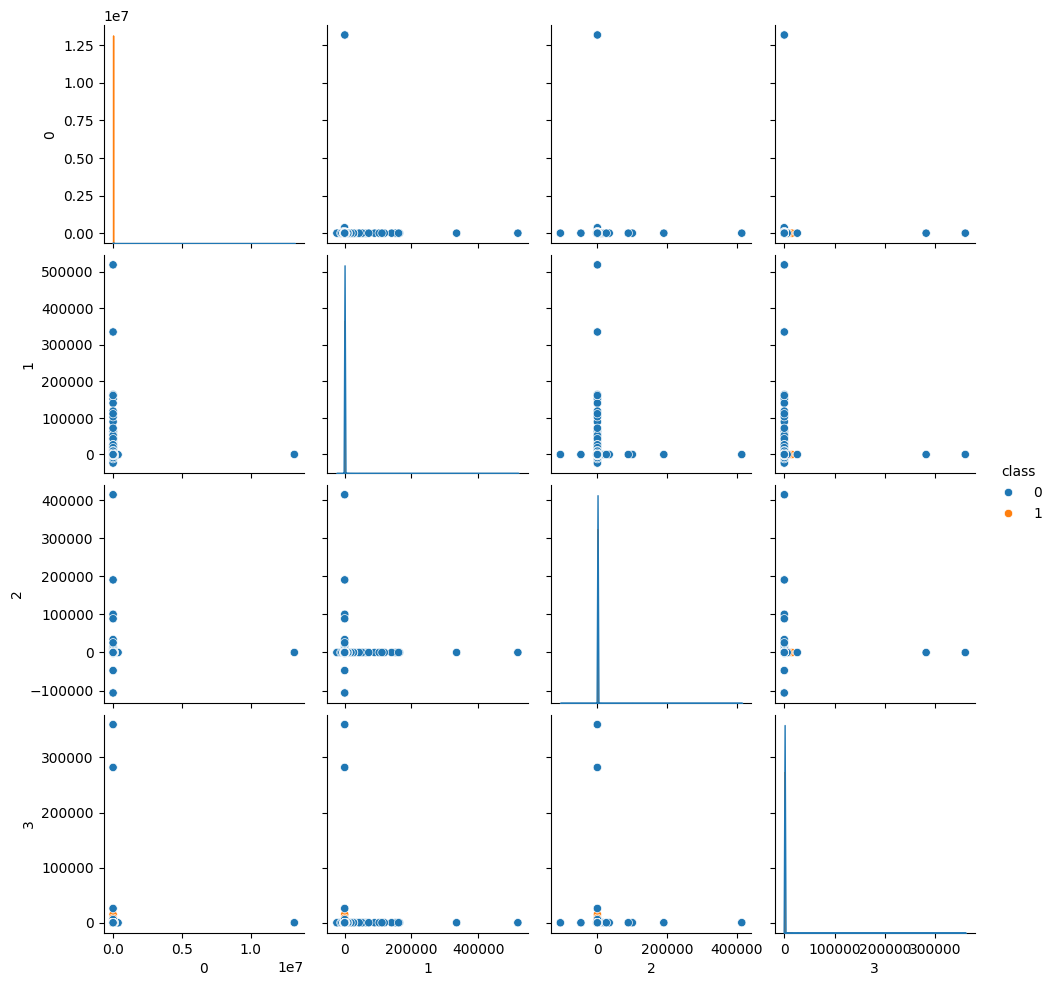

In [ ]:
# mozna z mean lub median
pipe_2 = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('standarization', RobustScaler()),
    ('pca', PCA(n_components=4))
])

X_train_2 = pipe_2.fit_transform(X_train)

print(f'Explained variance ratio: {pipe_2["pca"].explained_variance_ratio_}, ({sum(pipe_2["pca"].explained_variance_ratio_)})')

res_2_df = pd.concat([pd.DataFrame(X_train_2, index=X_train.index), pd.DataFrame(y_train)], axis=1)

sns.pairplot(res_2_df, hue='class')